In [12]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import random

## Problem 1 (GalaxyZoo/Classify)

Galaxy classification is done by volunteers online via the online platform Zooniverse. 

## Problem 2 (Willett et al. 2013)

Willett et al. 2013: https://arxiv.org/abs/1308.3496 



-304,122 galaxies in GZ2

-'The goal was to in- clude only the nearest, brightest, and largest systems for which fine morphological features can be resolved and classified.' (cuts in section 2.1)

-$m_r$ > 17

-each image is 424 × 424 pixels scaled to (0.02×petroR90_r) arcsec per pixel, 42.4 arcseconds (http://skyserver.sdss.org/dr7/en/help/docs/algorithm.asp?key=mag_petro)

-decision tree is used, 'The GZ2 tree has 11 classification tasks with a total of 37 possible responses'

-GZ1 section 3.3 no debiasing and no decision tree

-section 2.4 (site history) 'For most of the duration of GZ2, images shown to classifiers were randomly selected from the database. To ensure that each galaxy ultimately had enough responses to accurately characterize the likelihood of the classification, images with low numbers of classifications were shown at a higher rate toward the end of the project'

-unreliable classifications -> section 3.2 individual user weighting 

-3.3 classification bias -> 'the presumed cause is that more distant galaxies, on average, are both smaller and dimmer in the cutout images. As a result, finer morphologi- cal features are more difficult to identify'



## Problem 3 (Conselice, 2014)


Conselice, 2014: https://arxiv.org/abs/1403.2783

-morphological classification infers galaxy evolution



## Problem 4 (Lotz et al., 2011,  Rodriguez-Gomez et al, 2015)

Rodriguez-Gomez et al, 2015: https://arxiv.org/abs/1502.01339

Lotz et al., 2011: https://arxiv.org/abs/1108.2508


-rodrigues-gomez "..it is important to quantify the galaxy-galaxy merger rate, namely, the frequency of galaxy mergers as a function of the masses of the objects involved, redshift, and possibly other parameters such as gas fractions. A precise determination of this quantity is of fundamental interest for understanding the growth and assembly of galaxies, for bringing galaxy formation models into agreement with the observed distribution of galaxy morphologies.."

## Problem 5 (opening training set and test set)

In [13]:
import tarfile

#file_train = tarfile.open('training_images.tar.gz')
#file_test = tarfile.open('test_images.tar.gz')

In [14]:
#file_train.extractall('./training_images')
#file_test.extractall('./test_images')

In [15]:
#file_test.close()
#file_train.close()

In [16]:
class Labels:
    
    def __init__(self, filename):
        self.filename = filename
        self.df = pd.read_csv(self.filename)
        self.galaxyids = list(self.df['GalaxyID'])
    
    def get_df(self):
        #return pandas dataframe
        
        return self.df   
    
    
    def get_label_vector(self, galaxyid):
        #return label vector given galaxyID
        
        index = self.galaxyids.index(galaxyid)
       
        return np.array(self.df.iloc[index][1:])

In [17]:
labels = Labels('training_classifications.csv')

In [18]:
training_labels_df = labels.get_df()
training_labels_df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [19]:
labels.get_label_vector(999950)

array([0.901216  , 0.098784  , 0.        , 0.        , 0.098784  ,
       0.        , 0.098784  , 0.        , 0.098784  , 0.        ,
       0.04537811, 0.05340589, 0.        , 0.127644  , 0.872356  ,
       0.40484065, 0.49637535, 0.        , 0.        , 0.        ,
       0.02132051, 0.        , 0.06209472, 0.04422877, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

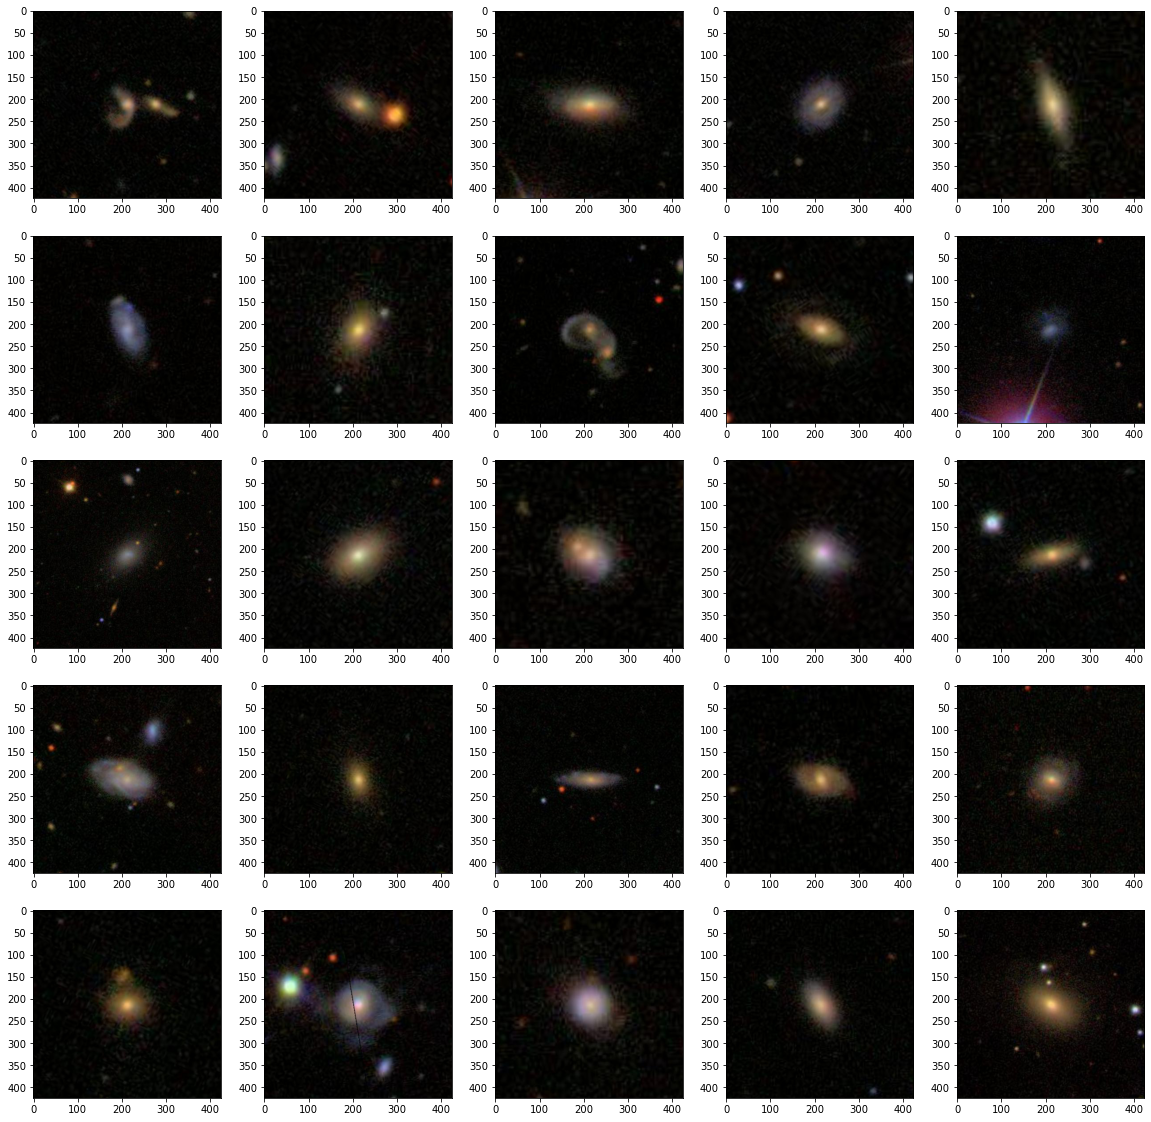

In [59]:
#plot 25 random images

fig, axs = plt.subplots(5, 5)
fig.set_size_inches(20, 20)

for i in range(5):
    for j in range(5):
        random_index = random.randint(0,len(training_labels_df)-1)
        galaxy_id = str(training_labels_df['GalaxyID'][random_index])

        file_name = 'training_images/training_images/' + galaxy_id + '.jpg'

        img = mpimg.imread(file_name)
        imgplot = axs[i, j].imshow(img)
        #axs[i,j].imshow(img)



## Problem 6 (histogram of labels)

buh
buh
buh


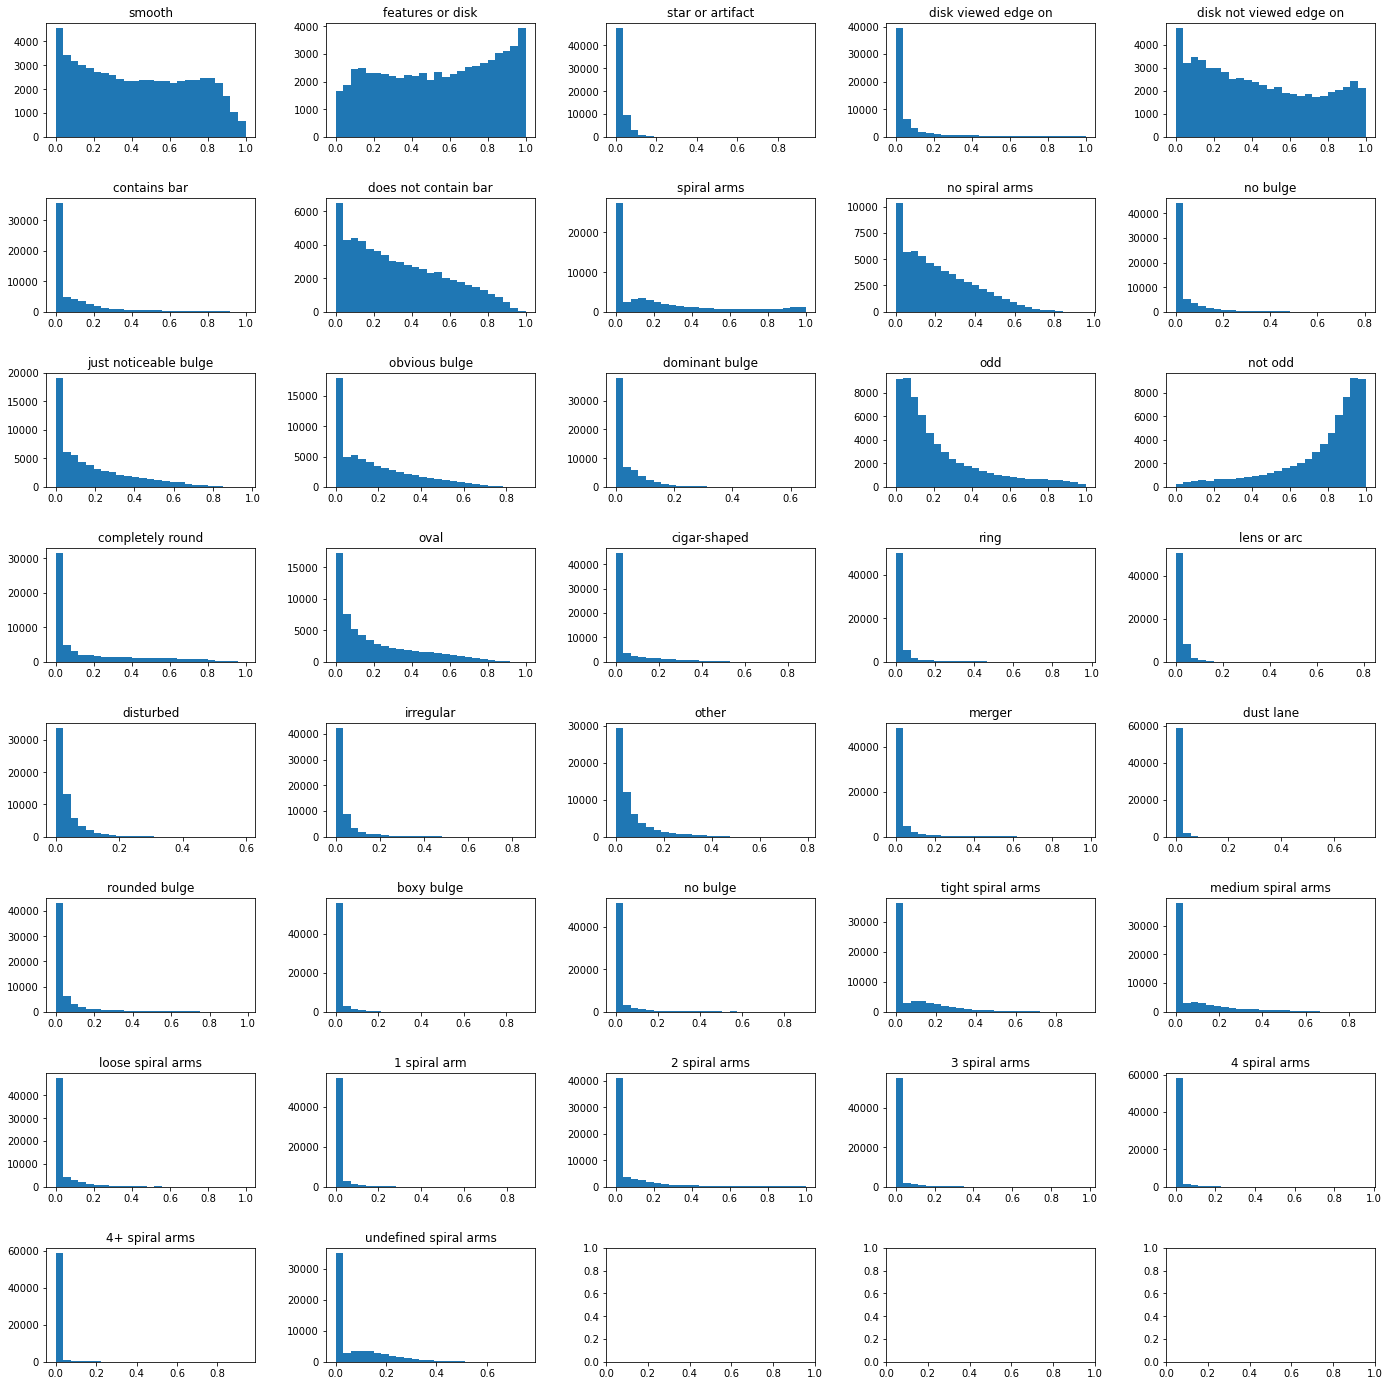

In [80]:
first_class = ['smooth', 'features or disk', 'star or artifact']
second_class = ['disk viewed edge on', 'disk not viewed edge on']
third_class = ['contains bar', 'does not contain bar']
fourth_class = ['spiral arms', 'no spiral arms']
fifth_class = ['no bulge', 'just noticeable bulge', 'obvious bulge', 'dominant bulge']
sixth_class = ['odd', 'not odd']
seventh_class = ['completely round', 'oval', 'cigar-shaped']
eighth_class = ['ring', 'lens or arc', 'disturbed', 'irregular', 'other', 'merger', 'dust lane']
ninth_class = ['rounded bulge', 'boxy bulge', 'no bulge']
tenth_class = ['tight spiral arms', 'medium spiral arms', 'loose spiral arms']
eleventh_class = ['1 spiral arm', '2 spiral arms', '3 spiral arms', '4 spiral arms', '4+ spiral arms', 'undefined spiral arms']

classes = first_class+second_class+third_class+fourth_class+fifth_class+sixth_class+seventh_class+eighth_class+ninth_class+tenth_class+eleventh_class

#implement axes subplots 

fig, axs = plt.subplots(8, 5)
fig.set_size_inches(20, 20)
fig.tight_layout(pad=4.0)

k = 0
for i in range(8):
    for j in range(5):
        try:
            axs[i,j].hist(training_labels_df[training_labels_df.columns[1:][k]], bins = 25)
            axs[i,j].set_title(classes[k])

            k += 1
        except:
            print('buh')
        

## Problem 7 (prototype)

buh
buh
buh


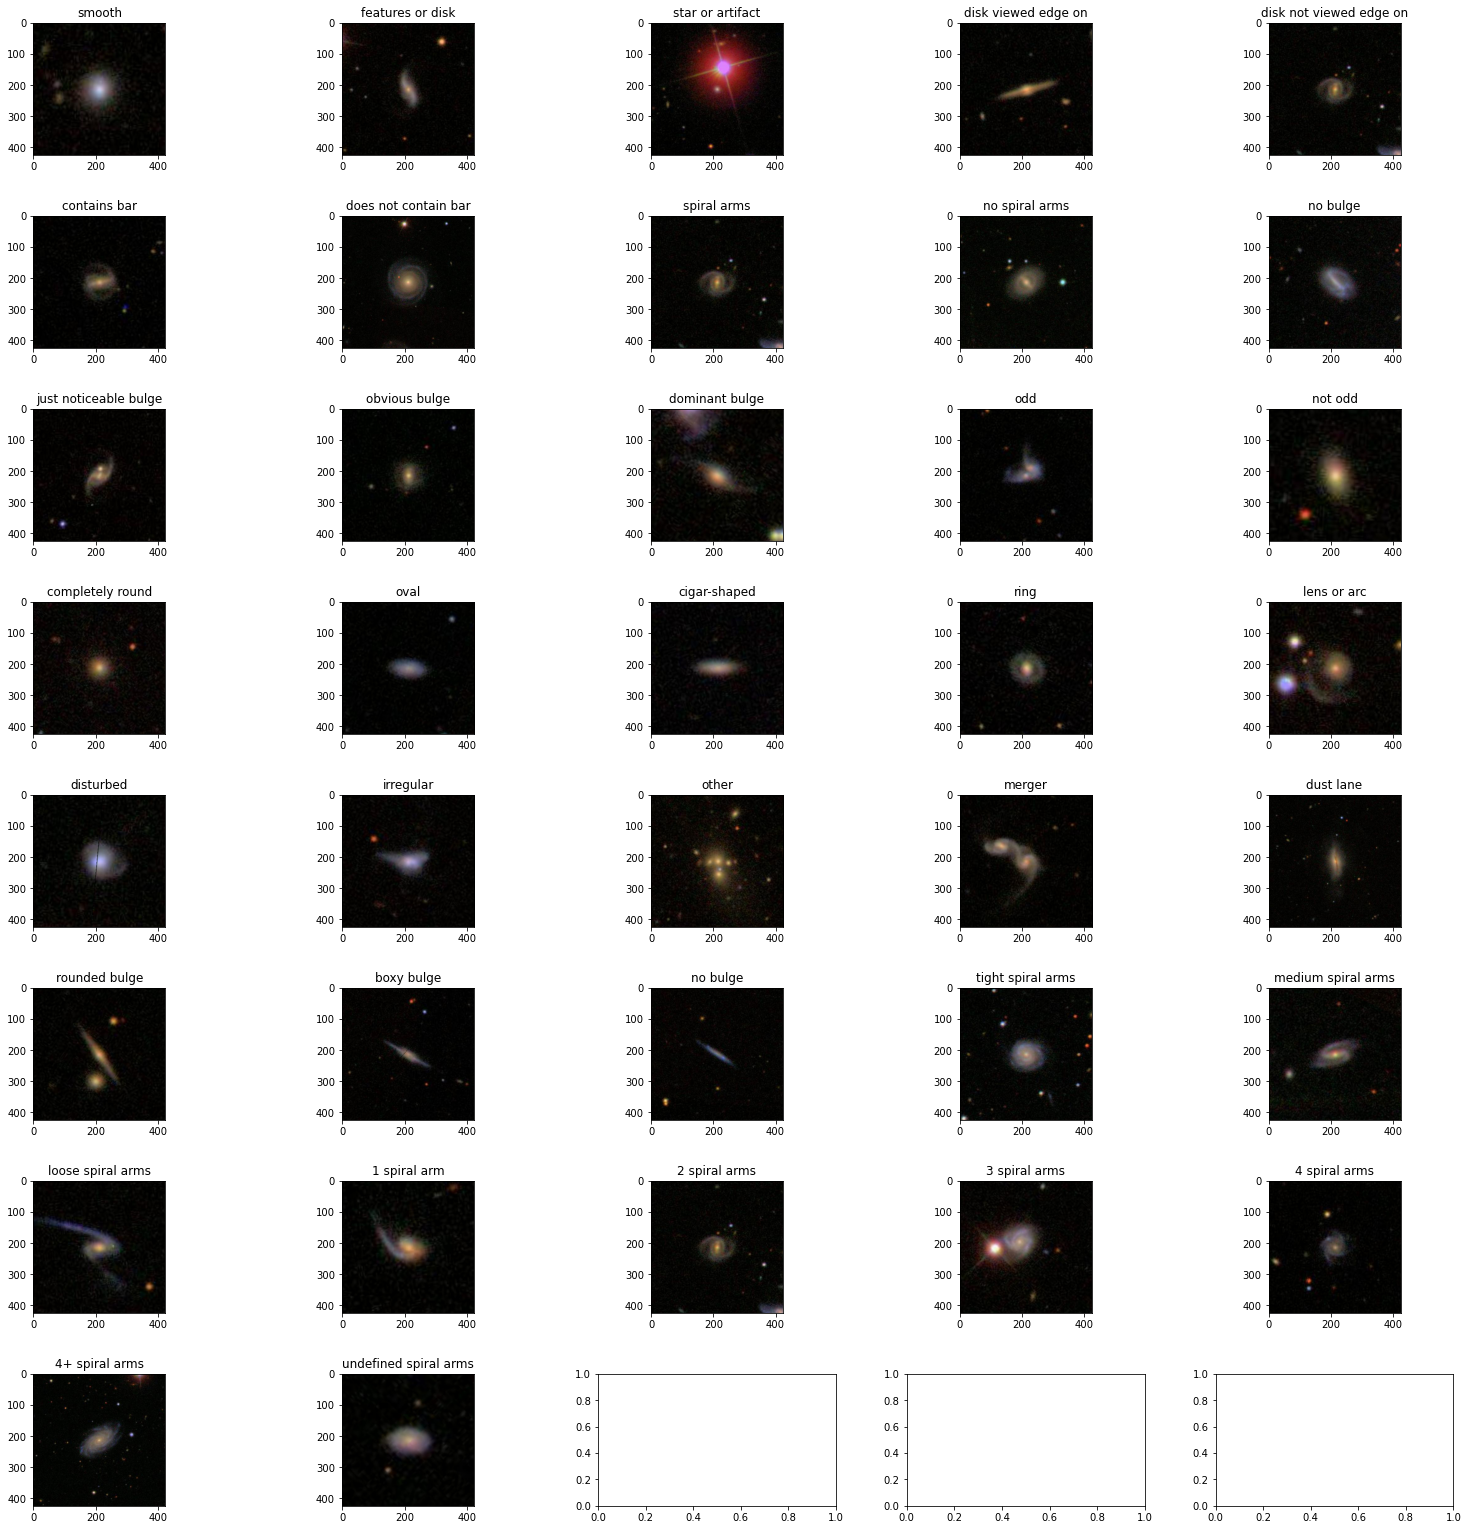

In [81]:
def plot_prototype(label, title):
    galaxy_id = str(training_labels_df['GalaxyID'][np.argmax(training_labels_df[label])])
    file_name = 'training_images/training_images/' + galaxy_id + '.jpg'
    img = mpimg.imread(file_name)
    #imgplot = plt.imshow(img)
    #plt.title(title)
    #plt.show()
    
    return img
    

'''i = 0
for training_label in training_labels_df.columns[1:]:
    plot_prototype(training_label, classes[i])
    i += 1'''
    
fig, axs = plt.subplots(8, 5)
fig.set_size_inches(22, 22)
fig.tight_layout(pad=4.0)

k = 0

for i in range(8):
    for j in range(5):
        try:
            axs[i,j].imshow(plot_prototype(training_labels_df.columns[1:][k], classes[k]))
            axs[i,j].set_title(classes[k])
            k += 1
        except:
            print('buh')


## Problem 8 (correlation matrix)

In [35]:
def correlation_matrix_element(class_i, class_j):
    i = np.array(training_labels_df[class_i])
    j = np.array(training_labels_df[class_j])
    
    num = np.mean(np.dot(i, j)) - np.mean(i)*np.mean(j)
    denom = np.sqrt(np.mean(np.dot(i,i)) - np.mean(i)**2) * np.sqrt(np.mean(np.dot(j,j)) - np.mean(j)**2)
    
    p_ij = num/denom
    
    return p_ij


correlation_matrix = []

for training_label_i in training_labels_df.columns[1:]:
    
    correlation_matrix_row = []
    
    for training_label_j in training_labels_df.columns[1:]:
        
        p_ij = correlation_matrix_element(training_label_i, training_label_j)
        correlation_matrix_row.append(p_ij)
        
    correlation_matrix.append(correlation_matrix_row)

correlation_matrix = np.array(correlation_matrix)

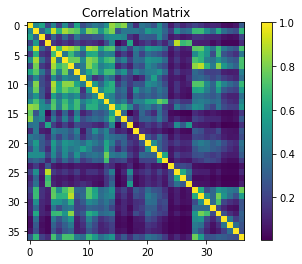

In [84]:
plt.figure()
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix)
plt.colorbar()

## Problem 9 (correlation sub-matrices)

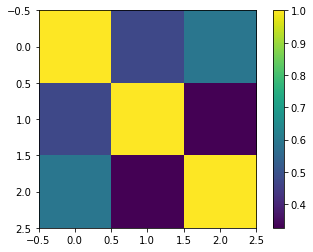

In [86]:
#class 1 WO

plt.imshow(correlation_matrix[0:3,0:3])
plt.colorbar()